# 【例題2.8】

## (6) 洪水追跡計算

解析結果からグラフを作成するプログラムです．

- 各時刻の水深，流積，流速，流量の空間分布を読み込む

- 各時間の空間分布を作成する．

- 各地点の経時変化を作成する．

- 水深と流量との関係を作成する．


In [1]:
"""解析結果からグラフを作成するプログラムです."""
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 定数の設定
INPUT_FILE_NAME = "ResKWave.xlsx"
WL_GRAPH_NAME = "WL"
GRAPH_EXT = ".pdf"
HQ_GRAPH_NAME = "HAndQ"
QT_GRAPH_NAME = "QT"
HQX_GRAPH_NAME = "hQX"
HQT_GRAPH_NAME = "hQT"
FONTSIZE_XYLABEL = 14
FONTSIZE_XYLABEL2 = 18
FONTSIZE_XYLABEL3 = 13
BLACK = "black"
GRAY = "gray"
H_MARGIN = 5.0
H_MIN = 1.0
H_MAX = 5.0
Q_MIN = 0.0
Q_MAX = 2100.

#### 入力データを読み込みとグラフを作成するクラス

In [2]:
class DrawGraph:
    """入力データを読み込むクラス."""

    def __init__(self):
        """解析結果の読み込み."""
        __input_file = pd.ExcelFile(INPUT_FILE_NAME)
        self.sheetNames = __input_file.sheet_names
        self.data = pd.read_excel(INPUT_FILE_NAME, sheet_name=self.sheetNames)

    def drawWLProfile(self):
        """水面形のグラフを作成."""
        __fileNo = 0
        for __sheetName in self.sheetNames:
            __colName = self.data[__sheetName].columns
            # データの読み込み
            self.x = np.array(self.data[__sheetName][__colName[0]])  # x
            self.zb = np.array(self.data[__sheetName][__colName[1]])  # zb
            self.H = np.array(self.data[__sheetName][__colName[2]])  # H
            # グラフの作成
            __time = __sheetName.split()[0]
            __time = '{:.5g}'.format(float(__time))
            plt.figure(figsize=(10, 5.))
            plt.xlim(np.min(self.x), np.max(self.x))
            plt.ylim(np.min(self.zb), np.max(self.zb)+H_MARGIN)
            plt.grid()
            plt.plot(self.x, self.zb, color=BLACK, label="$z_b$")
            plt.plot(self.x, self.H, color=GRAY, label="$H$")
            plt.legend(fontsize=FONTSIZE_XYLABEL, fancybox=False, framealpha=1)
            plt.xlabel("$x$(km)", fontsize=FONTSIZE_XYLABEL)
            plt.ylabel("$z_b$, $H$ (m)", fontsize=FONTSIZE_XYLABEL)
            plt.title(str(__time)+' hr')
            __no = str('{0:04d}'.format(int(__fileNo)))
            plt.savefig(WL_GRAPH_NAME+__no+GRAPH_EXT,
                        transparent=True, bbox_inches='tight')
            plt.close()
            __fileNo += 1

    def drawHandQProfile(self, _setTime):
        """hとQの空間分布のグラフを作成."""
        __useDataNo = []
        __t = []
        # シート名の読み込み
        for __sheetName in self.sheetNames:
            __time = __sheetName.split()[0]
            __time = float('{:.5g}'.format(float(__time)))
            __t.append(__time)
        __t = np.array(__t)
        # plotする時刻のファイル番号の抽出
        for __tmpTime in _setTime:
            __useDataNo.append(np.where(__t == __tmpTime)[0][0])
        # 図作成
        fig, axes = plt.subplots(1, 2, figsize=(12.5, 2.5), tight_layout=True)
        for __no in __useDataNo:
            __sheetName = self.sheetNames[__no]
            __colName = self.data[__sheetName].columns
            # データの読み込み
            self.x = np.array(self.data[__sheetName][__colName[0]])  # x
            self.h = np.array(self.data[__sheetName][__colName[3]])  # h
            self.Q = np.array(self.data[__sheetName][__colName[5]])  # Q
            axes[0].plot(self.x, self.h, label=str(__t)+'hr', color=BLACK)
            axes[1].plot(self.x, self.Q, label=str(__t)+'hr', color=BLACK)

        for i in range(2):
            axes[i].set_xlim(np.min(self.x), np.max(self.x))
            axes[i].grid()
            axes[i].set_xlabel("$x$ (km)", fontsize=FONTSIZE_XYLABEL2)
            axes[i].tick_params(axis='x', labelsize=FONTSIZE_XYLABEL3)
            axes[i].tick_params(axis='y', labelsize=FONTSIZE_XYLABEL3)

        axes[0].set_ylabel("$h$ (m)", fontsize=FONTSIZE_XYLABEL2)
        axes[1].set_ylabel("$Q$ (m$^3/$s)", fontsize=FONTSIZE_XYLABEL2)
        axes[0].set_ylim(H_MIN, H_MAX)
        axes[1].set_ylim(Q_MIN, Q_MAX)
        plt.savefig(HQX_GRAPH_NAME+GRAPH_EXT,
                    transparent=True, bbox_inches='tight')

    def getTimeSeries(self, _setDistance):
        """水深・流量を経時変化で整理."""
        __useDataNo = []
        __t = []
        __h = []
        __Q = []
        __sheetName = self.sheetNames[0]
        __colName = self.data[__sheetName].columns
        self.x = np.array(self.data[__sheetName][__colName[0]])  # x
        # 出力格子番号の取得
        for __x in _setDistance:
            __useDataNo.append(np.where(self.x == __x)[0][0])
        # 時刻の取得
        for __sheetName in self.sheetNames:
            __time = __sheetName.split()[0]
            __time = '{:.5g}'.format(float(__time))
            __t.append(float(__time))
        __t = np.array(__t)
        # 時系列dataへの変換
        for __i in __useDataNo:
            __tmpx = []
            __tmph = []
            __tmpQ = []
            for __sheetName in self.sheetNames:
                __colName = self.data[__sheetName].columns
                # データの読み込み
                self.x = np.array(self.data[__sheetName][__colName[0]])  # x
                self.h = np.array(self.data[__sheetName][__colName[3]])  # h
                self.Q = np.array(self.data[__sheetName][__colName[5]])  # Q
                __tmpx.append(self.x[__i])
                __tmph.append(self.h[__i])
                __tmpQ.append(self.Q[__i])
            __h.append(__tmph)
            __Q.append(__tmpQ)
        self.t = __t
        self.ht = __h
        self.Qt = __Q

    def drawTimeDisH(self, _setDistance):
        """流量・水深の経時変化のグラフを作成."""
        # グラフの作成
        fig, axes = plt.subplots(2, 1, figsize=(5., 5.), tight_layout=True)
        for __i in range(len(_setDistance)):
            axes[0].plot(self.t, self.Qt[__i],
                         label=str(_setDistance[__i])+"(km)")
            axes[1].plot(self.t, self.ht[__i],
                         label=str(_setDistance[__i])+"(km)")
        for __i in range(2):
            axes[__i].set_xlim(np.min(self.t), np.max(self.t))
            axes[__i].legend(fontsize=FONTSIZE_XYLABEL, fancybox=False,
                             framealpha=1)
            axes[__i].grid()
        axes[0].set_ylim(Q_MIN, Q_MAX)
        axes[1].set_ylim(H_MIN, H_MAX)
        axes[1].set_xlabel("$t$ (hr)", fontsize=FONTSIZE_XYLABEL)
        axes[0].set_ylabel("$Q$ (m$^3/s$)", fontsize=FONTSIZE_XYLABEL)
        axes[1].set_ylabel("$h$ (m)", fontsize=FONTSIZE_XYLABEL)
        plt.savefig(HQT_GRAPH_NAME+GRAPH_EXT, transparent=True,
                    bbox_inches='tight')

    def drawTimeDis(self, _setDistance):
        """流量ハイドログラフを作成."""
        plt.figure(figsize=(5, 2.5))
        for __i in range(len(_setDistance)):
            plt.plot(self.t, self.Qt[__i],
                     label=str(_setDistance[__i])+"(km)")
        plt.xlim(np.min(self.t), np.max(self.t))
        plt.legend(fontsize=FONTSIZE_XYLABEL, fancybox=False, framealpha=1)
        plt.grid()
        plt.ylim(Q_MIN, Q_MAX)
        plt.xlabel("$t$ (hr)", fontsize=FONTSIZE_XYLABEL)
        plt.ylabel("$Q$ (m$^3/s$)", fontsize=FONTSIZE_XYLABEL)
        plt.savefig(QT_GRAPH_NAME+GRAPH_EXT, transparent=True,
                    bbox_inches='tight')

    def drawHQ(self, _setDistance):
        """H~Q曲線の作成."""
        plt.figure(figsize=(5, 5.))
        plt.grid()
        for __i in range(len(_setDistance)):
            __zip_lists = zip(self.ht[__i], self.Qt[__i])
            __zip_sort = sorted(__zip_lists)
            self.ht[__i], self.Qt[__i] = zip(*__zip_sort)
            plt.plot(self.Qt[__i], self.ht[__i],
                     label=str(_setDistance[__i])+"(km)")
        plt.legend(fontsize=FONTSIZE_XYLABEL, fancybox=False, framealpha=1)
        plt.xlim(Q_MIN, Q_MAX)
        plt.ylim(H_MIN, H_MAX)
        plt.xlabel("$Q$ (m$^3/s$)", fontsize=FONTSIZE_XYLABEL)
        plt.ylabel("$h$ (m)", fontsize=FONTSIZE_XYLABEL)
        plt.savefig(HQ_GRAPH_NAME+GRAPH_EXT, transparent=True,
                    bbox_inches='tight')

#### main関数

水面形状を作成したい場合には，
”# data.drawWLProfile()”
のコメントアウトを削除してください．

流量と水深の経時変化を作成したい場合には，
"# data.drawTimeDisH(__atX)  # Qとhの経時変化"
のコメントアウトを削除してください．


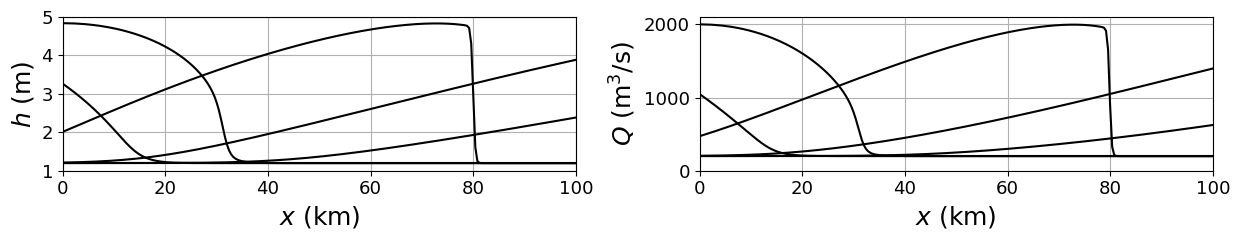

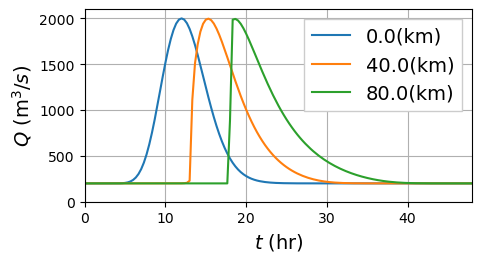

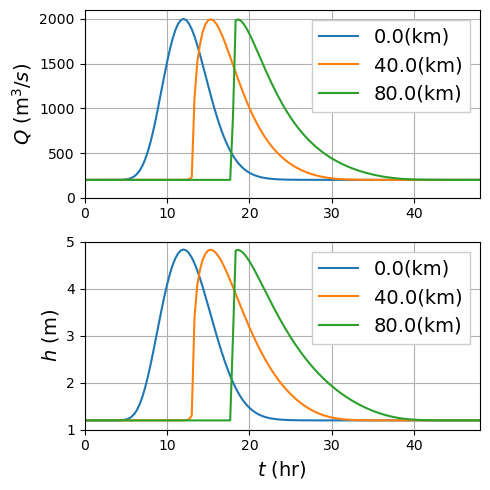

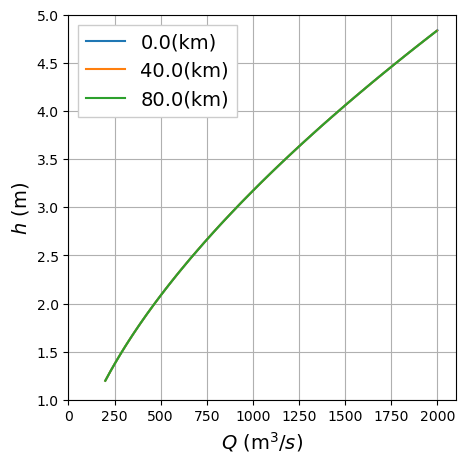

In [3]:
if __name__ == "__main__":
    """main関数"""
    data = DrawGraph()  # データの読み込み
    # 水面形の経時変化を作成（以下のコメントを削除すれば作成）
    # data.drawWLProfile()
    __timeDraw = np.array([0.0, 9.0, 12.0, 18.0, 24.0, 30.0])
    # __timeDrawに対応する時刻でのhとQの空間分布
    data.drawHandQProfile(__timeDraw)
    __atX = np.array([0.0, 40.0, 80.0])
    # __atXでのQの経時変化
    data.getTimeSeries(__atX)
    data.drawTimeDis(__atX)  # Qの経時変化
    data.drawTimeDisH(__atX)  # Qとhの経時変化
    # hQ curve
    data.drawHQ(__atX)